In [3]:
import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from collections import defaultdict
import community
import argparse
import sys
%matplotlib inline

# When the Map is Better than the Territory

In [4]:
def define_TPM(default=True, asnx=False):
    """Defines a transition probability matrix, default is TPM from two deterministic copy gates."""
    if default:
        tpm = np.array([[1.0,0,0,0],
                        [0,0,1.0,0],
                        [0,1.0,0,0],
                        [0,0,0,1.0]])
    if asnx:
        G = nx.from_numpy_matrix(tpm)
        return G
    
    return tpm

In [5]:
def define_intervention(TPM,Hmax=True):
    """This is an input distribution to the model (for EI, this must be Hmax)."""
    dim = float(TPM.shape[0])
    if Hmax:
        X = np.array([1/dim,1/dim,1/dim,1/dim])
    
    return X

In [6]:
def get_entropy(X):
    """Returns a list of the information in the model after the intervention (X) has been applied."""
    information_list = []
    for xi in range(len(X)):
        x = float(X[xi])
        if x > 0:
            self_information = x * np.log2(1/x)
        if x == 0:
            self_information = 0
        information_list.append(self_information)
    
    X_entropy = sum(information_list)
    return X_entropy

In [7]:
def joint_entropy(X, TPM):
    """Returns the joint entropy between X, the intervention and TPM, the system being intervened upon."""
    XY_joint_probs = np.array((TPM[0]*X[0]))
    for i in range(1,len(X)):
        x_prob = X[i]
        tpm_i = TPM[i]
        XY_joint_probs = np.vstack((XY_joint_probs,np.array(tpm_i * x_prob)))
    
    return XY_joint_probs

### Full Example:

In [8]:
TPM = define_TPM()
X = define_intervention(TPM)
print TPM
print
print X

[[ 1.  0.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  0.  1.]]

[ 0.25  0.25  0.25  0.25]


In [9]:
XY_joint_probs = joint_entropy(X, TPM)
Y = sum(XY_joint_probs)

print XY_joint_probs
print 
print Y

[[ 0.25  0.    0.    0.  ]
 [ 0.    0.    0.25  0.  ]
 [ 0.    0.25  0.    0.  ]
 [ 0.    0.    0.    0.25]]

[ 0.25  0.25  0.25  0.25]


In [10]:
X_entropy = get_entropy(X)
Y_entropy = get_entropy(Y)
print "The entropy of X is", X_entropy 
print "The entropy of Y is", Y_entropy 

The entropy of X is 2.0
The entropy of Y is 2.0


In [11]:
XY = XY_joint_probs.flatten()
XY_joint_entropy = get_entropy(XY)
print "The entropy of XY is", XY_joint_entropy 

The entropy of XY is 2.0


In [12]:
MI = X_entropy + Y_entropy - XY_joint_entropy
print "The mutual information between the intervention and effect distributions is", MI

The mutual information between the intervention and effect distributions is 2.0


In [13]:
def mutual_information(TPM="Example", intervention="Hmax", prnt=False):
    """Returns the mutual information between an intervention onto a causal model and the effect."""
    if type(TPM)==np.ndarray and intervention == "Hmax":
        X = define_intervention(TPM)
        XY_joint_probs = joint_entropy(X, TPM)
        Y = sum(XY_joint_probs)
        X_entropy = get_entropy(X)
        Y_entropy = get_entropy(Y)
        XY = XY_joint_probs.flatten()
        XY_joint_entropy = get_entropy(XY)
        MI = X_entropy + Y_entropy - XY_joint_entropy
        if prnt:
            print "The mutual information between the intervention and effect distributions is", MI
        return(MI)
    if TPM == "Example" and intervention == "Hmax":
        TPM = define_TPM()
        X = define_intervention(TPM)
        XY_joint_probs = joint_entropy(X, TPM)
        Y = sum(XY_joint_probs)
        X_entropy = get_entropy(X)
        Y_entropy = get_entropy(Y)
        XY = XY_joint_probs.flatten()
        XY_joint_entropy = get_entropy(XY)
        MI = X_entropy + Y_entropy - XY_joint_entropy
        if prnt:
            print "The mutual information between the intervention and effect distributions is", MI
        return(MI)    

In [14]:
MI_examp = mutual_information()

## Example with four separate TPMs

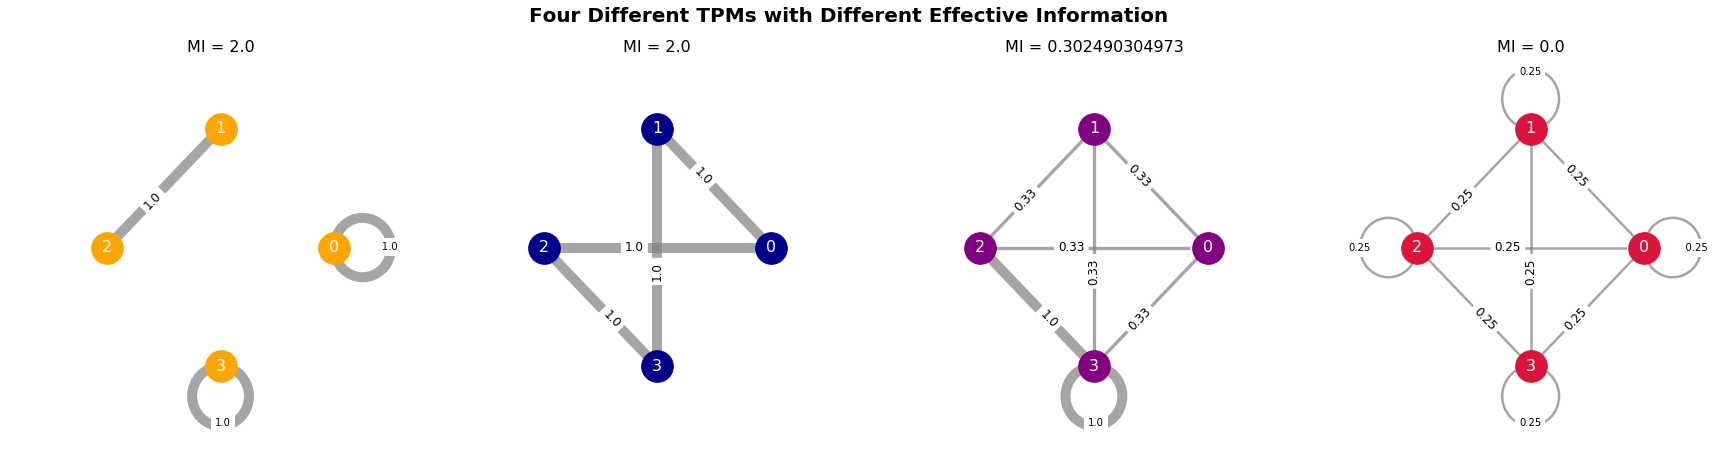

In [16]:
M0 = define_TPM()
g0 = nx.from_numpy_matrix(M0)
MI0 = mutual_information(M0)

M1 = np.array([[0,0,1.0,0], 
               [1.0,0,0,0], 
               [0,0,0,1.0], 
               [0,1.0,0,0]])
g1 = nx.from_numpy_matrix(M1)
MI1 = mutual_information(M1)

M2 = np.array([[0.33,0.33,0.33,0.33], 
               [0.33,0.33,0.33,0.33], 
               [0,0,0,1], 
               [0,0,0,1]])
g2 = nx.from_numpy_matrix(M2)
MI2 = mutual_information(M2)

M3 = np.array([[1./4,1./4,1./4,1./4], 
               [1./4,1./4,1./4,1./4], 
               [1./4,1./4,1./4,1./4], 
               [1./4,1./4,1./4,1./4]])
g3 = nx.from_numpy_matrix(M3)
MI3 = mutual_information(M3)

# Drawing
pos0 = nx.circular_layout(g0)
pos1 = nx.circular_layout(g1)
pos2 = nx.circular_layout(g2)
pos3 = nx.circular_layout(g3)

el0 = {(n1,n2): g0[n1][n2]['weight'] for (n1,n2) in g0.edges()}
el1 = {(n1,n2): g1[n1][n2]['weight'] for (n1,n2) in g1.edges()}
el2 = {(n1,n2): g2[n1][n2]['weight'] for (n1,n2) in g2.edges()}
el3 = {(n1,n2): g3[n1][n2]['weight'] for (n1,n2) in g3.edges()}
el0w = [g0[u][v]['weight']*10 for u,v in g0.edges()]
el1w = [g1[u][v]['weight']*10 for u,v in g1.edges()]
el2w = [g2[u][v]['weight']*10 for u,v in g2.edges()]
el3w = [g3[u][v]['weight']*10 for u,v in g3.edges()]

fig, ax = plt.subplots(1, 4, figsize=(30, 7))
fig.suptitle('Four Different TPMs with Different Effective Information', fontsize=20, fontweight='bold')

nx.draw_networkx_nodes(g0, pos0, node_size=1000, ax=ax[0], node_color='orange')
nx.draw_networkx_nodes(g1, pos1, node_size=1000, ax=ax[1], node_color='darkblue')
nx.draw_networkx_nodes(g2, pos2, node_size=1000, ax=ax[2], node_color='purple')
nx.draw_networkx_nodes(g3, pos3, node_size=1000, ax=ax[3], node_color='crimson')

nx.draw_networkx_edges(g0, pos0, ax=ax[0], edge_color= "grey", width=el0w, alpha=0.7)
nx.draw_networkx_edges(g1, pos1, ax=ax[1], edge_color= "grey", width=el1w, alpha=0.7)
nx.draw_networkx_edges(g2, pos2, ax=ax[2], edge_color= "grey", width=el2w, alpha=0.7)
nx.draw_networkx_edges(g3, pos3, ax=ax[3], edge_color= "grey", width=el3w, alpha=0.7)

nx.draw_networkx_labels(g0,pos0,font_size=16,ax=ax[0],font_color="white")
nx.draw_networkx_labels(g1,pos1,font_size=16,ax=ax[1],font_color="white")
nx.draw_networkx_labels(g2,pos2,font_size=16,ax=ax[2],font_color="white")
nx.draw_networkx_labels(g3,pos3,font_size=16,ax=ax[3],font_color="white")

nx.draw_networkx_edge_labels(g0, pos0, edge_labels=el0, ax=ax[0], label_pos=0.4, font_size=12, alpha=0.7)
nx.draw_networkx_edge_labels(g1, pos1, edge_labels=el1, ax=ax[1], label_pos=0.4, font_size=12, alpha=0.7)
nx.draw_networkx_edge_labels(g2, pos2, edge_labels=el2, ax=ax[2], label_pos=0.4, font_size=12, alpha=0.7)
nx.draw_networkx_edge_labels(g3, pos3, edge_labels=el3, ax=ax[3], label_pos=0.4, font_size=12, alpha=0.7)

radius = 0.25
selfloop01 = plt.Circle(((pos0[0][0]+radius), 0), radius, color='grey', lw=10.0, alpha=0.7, fill=False)
ax[0].add_artist(selfloop01)
ax[0].text((pos0[0][0]+radius), -0.02, '      1.0', bbox={'facecolor':'white', 'edgecolor':'none'})
selfloop02 = plt.Circle((0, (pos0[3][1]-radius)), radius, color='grey', lw=10.0, alpha=0.7, fill=False)
ax[0].add_artist(selfloop02)
ax[0].text(-0.05, (pos0[3][1]-radius-radius), '1.0', bbox={'facecolor':'white', 'edgecolor':'none'})

selfloop21 = plt.Circle((0, (pos2[3][1]-radius)), radius, color='grey', lw=10.0, alpha=0.7, fill=False)
ax[2].add_artist(selfloop21)
ax[2].text(-0.05, (pos2[3][1]-radius-radius), '1.0', bbox={'facecolor':'white', 'edgecolor':'none'})

selfloop30 = plt.Circle(((pos3[0][0]+radius), 0), radius, color='grey', lw=2.5, alpha=0.7, fill=False)
ax[3].add_artist(selfloop30)
ax[3].text((pos3[0][0]+radius), -0.03, '    0.25', bbox={'facecolor':'white', 'edgecolor':'none'})
selfloop31 = plt.Circle((0, (pos3[1][1]+radius)), radius, color='grey', lw=2.5, alpha=0.7, fill=False)
ax[3].add_artist(selfloop31)
ax[3].text(-0.1, (pos3[1][1]+radius+radius-0.05), '0.25', bbox={'facecolor':'white', 'edgecolor':'none'})
selfloop32 = plt.Circle(((pos3[2][0]-radius), 0), radius, color='grey', lw=2.5, alpha=0.7, fill=False)
ax[3].add_artist(selfloop32)
ax[3].text((pos3[2][0]-radius-radius-0.1), -0.03, '0.25', bbox={'facecolor':'white', 'edgecolor':'none'})
selfloop33 = plt.Circle((0, (pos3[3][1]-radius)), radius, color='grey', lw=2.5, alpha=0.7, fill=False)
ax[3].add_artist(selfloop33)
ax[3].text(-0.1, (pos3[3][1]-radius-radius), '0.25', bbox={'facecolor':'white', 'edgecolor':'none'})


title0="MI = "+str(mutual_information(M0))
title1="MI = "+str(mutual_information(M1))
title2="MI = "+str(mutual_information(M2))
title3="MI = "+str(mutual_information(M3))

ax[0].set_title(title0, fontdict={'fontsize':16})
ax[1].set_title(title1, fontdict={'fontsize':16})
ax[2].set_title(title2, fontdict={'fontsize':16})
ax[3].set_title(title3, fontdict={'fontsize':16})

ax[0].set_axis_off()
ax[1].set_axis_off()
ax[2].set_axis_off()
ax[3].set_axis_off()
ax[0].set_xlim((-1.6, 1.6))
ax[0].set_ylim((-1.6, 1.6))
ax[1].set_xlim((-1.6, 1.6))
ax[1].set_ylim((-1.6, 1.6))
ax[2].set_xlim((-1.6, 1.6))
ax[2].set_ylim((-1.6, 1.6))
ax[3].set_xlim((-1.6, 1.6))
ax[3].set_ylim((-1.6, 1.6))

plt.show()
#plt.savefig("Four_Different_TPMs.png", dpi = 300)

______________________

In [4]:
def read_graph(filename):
    G = nx.Graph()
    array = np.loadtxt(filename, dtype=int)
    G.add_edges_from(array)
    return G

# HK Network
def r_subset(repeated_nodes, m):
    targets = set()
    while len(targets) < m:
        x = np.random.choice(repeated_nodes)
        targets.add(x)
    return targets

def HK_network(n, m0, p):
    """Holme and Kim algorithm for growing graphs with powerlaw degree distribution 
    and approximate average clustering."""
    
    G = nx.empty_graph(m0) # add m0 initial nodes
    repeated_nodes = list(G.nodes()) 
    # list of existing nodes to sample from with nodes repeated once for each adjacent edge
        
    for source in range(m0, n):
        possible_targets = r_subset(repeated_nodes,m0)
        target=possible_targets.pop()
        G.add_edge(source,target)
        repeated_nodes.append(target) # add one node to list for each new link
        count=1
        while count < m0:  # add m0-1 more new links
            if np.random.random() < p: # clustering step: add triangle
                neighborhood=[nbr for nbr in G.neighbors(target) if not G.has_edge(source,nbr) and not nbr==source]
                if neighborhood: # if there is a neighbor without a link
                    nbr=np.random.choice(neighborhood)
                    G.add_edge(source,nbr) # add triangle
                    repeated_nodes.append(nbr)
                    count = count + 1
                    continue # go to top of while loop
            # else do preferential attachment step if above fails
            target=possible_targets.pop()
            G.add_edge(source,target)
            repeated_nodes.append(target)
            count=count+1

        repeated_nodes.extend([source]*m0)  # add source node to list m0 times
    return G

In [5]:
# https://snap.stanford.edu/data/facebook_combined.txt.gz
fb = read_graph('facebook_combined.txt')
fb_N, fb_E = fb.order(), fb.size()
print "Facebook network with %d nodes and %d edges." % (fb_N, fb_E)

kws = int(round(2 * fb_E / fb_N))
ws = nx.watts_strogatz_graph(fb_N, kws, p=0.05)

kba = int(round(fb_E / fb_N))
ba = nx.barabasi_albert_graph(fb_N, kba)

khk = int(round(fb_E / fb_N))
hk = HK_network(fb_N, khk, 1.0)

ker = int(round(2 * fb_E / fb_N))
er = nx.erdos_renyi_graph(fb_N, ker/float(fb_N))

print "WS network with %d nodes and %d edges." % (ws.order(), ws.size())
print "BA network with %d nodes and %d edges." % (ba.order(), ba.size())
print "HK network with %d nodes and %d edges." % (hk.order(), hk.size())
print "ER network with %d nodes and %d edges." % (er.order(), er.size())

Facebook network with 4039 nodes and 88234 edges.
WS network with 4039 nodes and 84819 edges.
BA network with 4039 nodes and 84378 edges.
HK network with 4039 nodes and 84374 edges.
ER network with 4039 nodes and 86159 edges.


In [5]:
def plot_degree(degree, number_of_bins=50, log_binning=False, base=2):
    """Plot the degree distribution with (log) binning."""
    lower_bound = min(degree)
    upper_bound = max(degree)
    
    if log_binning:
        log = np.log2 if base == 2 else np.log10
        lower_bound = log(lower_bound) if lower_bound >= 1 else 0.0
        upper_bound = log(upper_bound)
        bins = np.logspace(lower_bound,upper_bound,number_of_bins, base=base)
    else:
        bins = np.linspace(lower_bound,upper_bound,number_of_bins)
    
    y, __ = np.histogram(degree, bins=bins, density=True)
    x = bins[1:] - np.diff(bins)/2.0
        
    return x,y

In [6]:
def eff_net(G, log_base=2):
    degrees = G.degree()
    N = float(G.order())
    eff_dict = G.degree()
    for node, deg in degrees.items():
#        eff_dict[node] = deg * np.log2(N/deg) / N
        eff_dict[node] = deg * np.log2(N/deg)
    
    return eff_dict

In [7]:
def eff_net_pr(G, log_base=2):
    degrees = G.degree()
    N = float(G.order())
    eff_dict = G.degree()
    
    pr = nx.pagerank(G)
    tot_pr = sum(pr.values())
    
    for node_i, deg in degrees.items():
        eff_node_i = 0
        pr_i = pr[node_i]
        for node_j in G.neighbors(node_i):
            pr_j = pr[node_j]
            eff_node_i += pr_j * np.log2(N/deg) / tot_pr

        eff_dict[node_i] = eff_node_i
    
    return eff_dict

In [9]:
fb_eff = eff_net(fb)
ws_eff = eff_net(ws)
ba_eff = eff_net(ba)
er_eff = eff_net(er)
hk_eff = eff_net(hk)

print "WS:", sum(ws_eff.values())
print "BA:", sum(ba_eff.values())
print "ER:", sum(er_eff.values())
print "FB:", sum(fb_eff.values())
print "HK:", sum(hk_eff.values())

WS: 1117349.44478
BA: 1053322.30627
ER: 1128371.78105
FB: 1022881.08571
HK: 1053677.91705


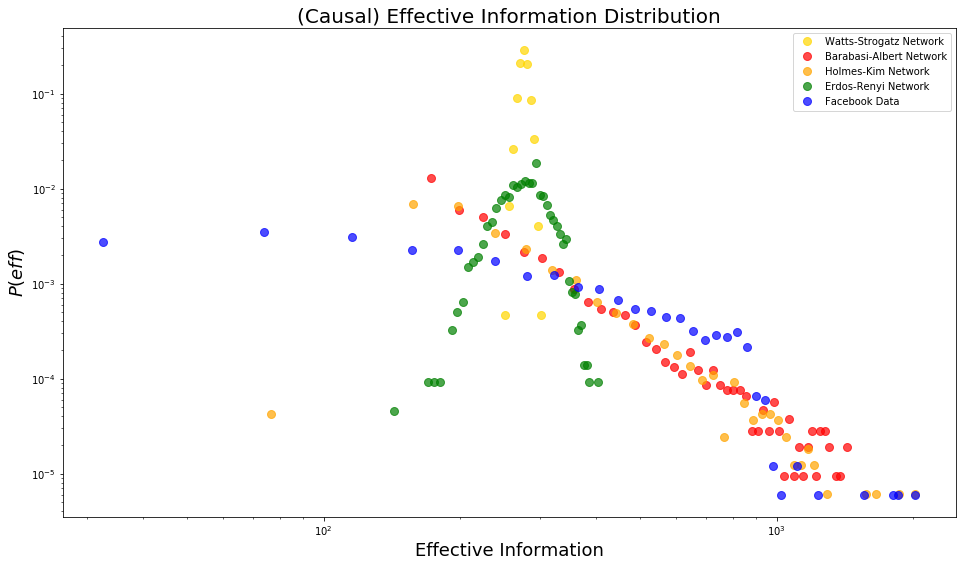

In [10]:
x_fb,y_fb = plot_degree(fb_eff.values(),number_of_bins=50, log_binning=False)
x_ws,y_ws = plot_degree(ws_eff.values(),number_of_bins=50, log_binning=False)
x_ba,y_ba = plot_degree(ba_eff.values(),number_of_bins=50, log_binning=False)
x_hk,y_hk = plot_degree(hk_eff.values(),number_of_bins=50, log_binning=False)
x_er,y_er = plot_degree(er_eff.values(),number_of_bins=50, log_binning=False)

plt.figure(figsize=(16,9))
plt.loglog(x_ws, y_ws, 'o', markersize = 8, alpha = 0.7, color = "gold", label = "Watts-Strogatz Network")
plt.loglog(x_ba, y_ba, 'o', markersize = 8, alpha = 0.7, color = "red", label = "Barabasi-Albert Network")
plt.loglog(x_hk, y_hk, 'o', markersize = 8, alpha = 0.7, color = "orange", label = "Holmes-Kim Network")
plt.loglog(x_er, y_er, 'o', markersize = 8, alpha = 0.7, color = "green", label = "Erdos-Renyi Network")
plt.loglog(x_fb, y_fb, 'o', markersize = 8, alpha = 0.7, color = "blue", label = "Facebook Data")

plt.xlabel("Effective Information", size = 18)
plt.ylabel("$P(eff)$", size = 18)
plt.legend()
plt.title("(Causal) Effective Information Distribution", size = 20)
plt.show()

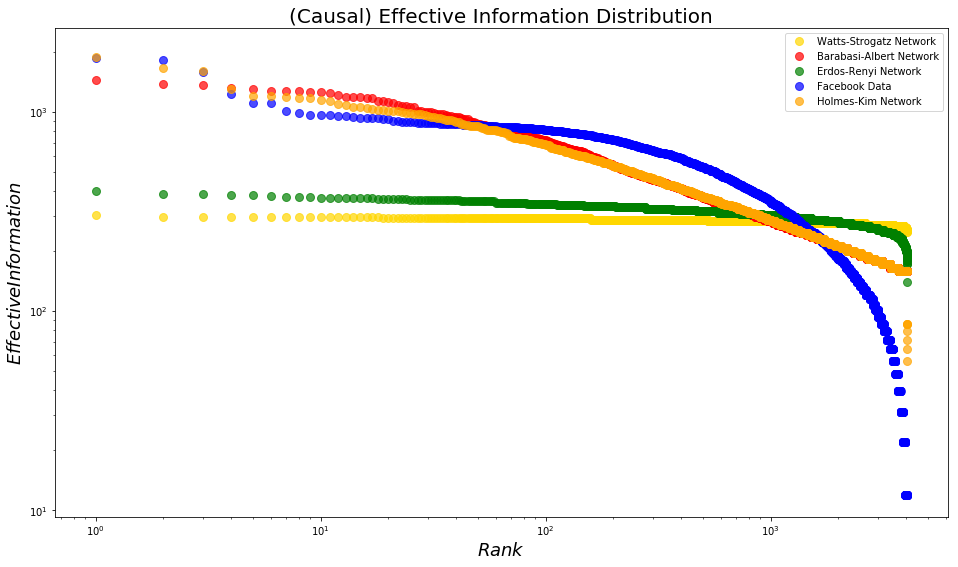

In [11]:
plt.figure(figsize=(16,9))
plt.loglog(range(ws.order()), sorted(ws_eff.values(), reverse=True), 'o', 
           markersize = 8, alpha = 0.7, color = "gold", label = "Watts-Strogatz Network")
plt.loglog(range(ba.order()), sorted(ba_eff.values(), reverse=True), 'o', 
           markersize = 8, alpha = 0.7, color = "red", label = "Barabasi-Albert Network")
plt.loglog(range(er.order()), sorted(er_eff.values(), reverse=True), 'o', 
           markersize = 8, alpha = 0.7, color = "green", label = "Erdos-Renyi Network")
plt.loglog(range(fb.order()), sorted(fb_eff.values(), reverse=True), 'o',
           markersize = 8, alpha = 0.7, color = "blue", label = "Facebook Data")
plt.loglog(range(hk.order()), sorted(hk_eff.values(), reverse=True), 'o', 
           markersize = 8, alpha = 0.7, color = "orange", label = "Holmes-Kim Network")

plt.xlabel("$Rank$", size = 18)
plt.ylabel("$Effective Information$", size = 18)
plt.legend()
plt.title("(Causal) Effective Information Distribution", size = 20)
plt.show()

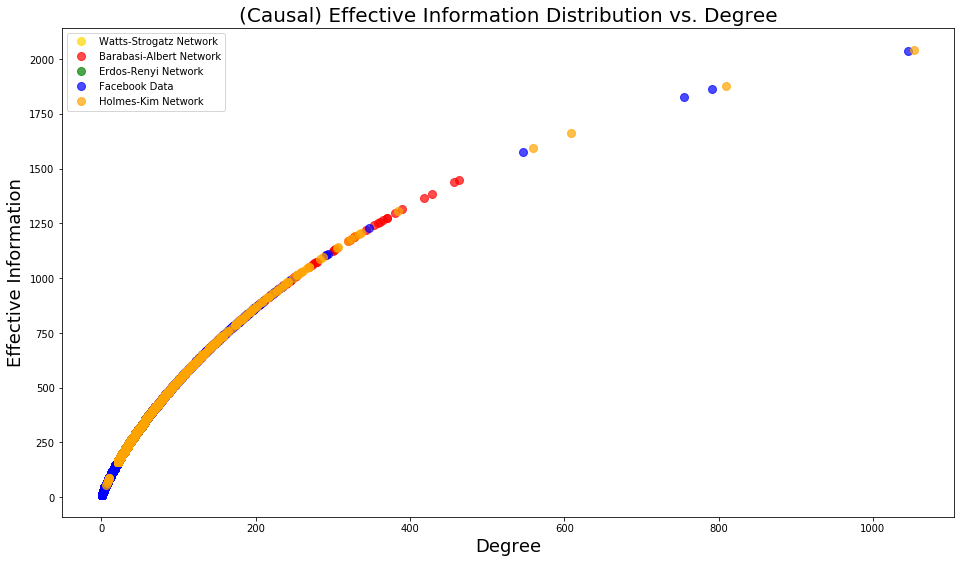

In [12]:
plt.figure(figsize=(16,9))
plt.plot(sorted(ws.degree().values(), reverse=True), sorted(ws_eff.values(), reverse=True), 
           'o', markersize = 8, alpha = 0.7, color = "gold", label = "Watts-Strogatz Network")
plt.plot(sorted(ba.degree().values(), reverse=True), sorted(ba_eff.values(), reverse=True), 
           'o', markersize = 8, alpha = 0.7, color = "red", label = "Barabasi-Albert Network")
plt.plot(sorted(er.degree().values(), reverse=True), sorted(er_eff.values(), reverse=True), 
           'o', markersize = 8, alpha = 0.7, color = "green", label = "Erdos-Renyi Network")
plt.plot(sorted(fb.degree().values(), reverse=True), sorted(fb_eff.values(), reverse=True), 
           'o', markersize = 8, alpha = 0.7, color = "blue", label = "Facebook Data")
plt.plot(sorted(hk.degree().values(), reverse=True), sorted(hk_eff.values(), reverse=True), 
           'o', markersize = 8, alpha = 0.7, color = "orange", label = "Holmes-Kim Network")

plt.xlabel("Degree", size = 18)
plt.ylabel("Effective Information", size = 18)
plt.legend()
plt.title("(Causal) Effective Information Distribution vs. Degree", size = 20)
plt.show()

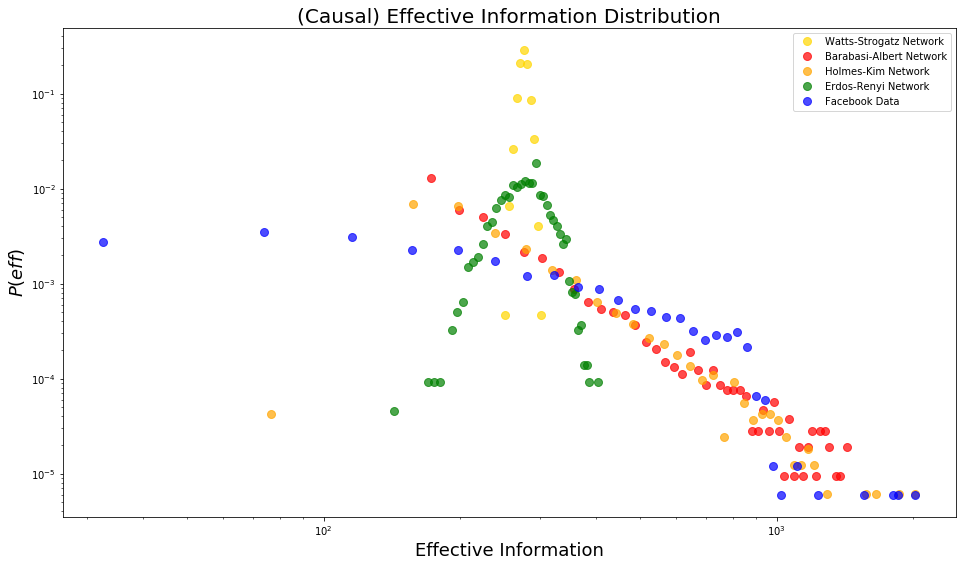

In [13]:
x_fb,y_fb = plot_degree(fb_eff.values(),number_of_bins=50, log_binning=False)
x_ws,y_ws = plot_degree(ws_eff.values(),number_of_bins=50, log_binning=False)
x_ba,y_ba = plot_degree(ba_eff.values(),number_of_bins=50, log_binning=False)
x_hk,y_hk = plot_degree(hk_eff.values(),number_of_bins=50, log_binning=False)
x_er,y_er = plot_degree(er_eff.values(),number_of_bins=50, log_binning=False)

plt.figure(figsize=(16,9))
plt.loglog(x_ws, y_ws, 'o', markersize = 8, alpha = 0.7, color = "gold", label = "Watts-Strogatz Network")
plt.loglog(x_ba, y_ba, 'o', markersize = 8, alpha = 0.7, color = "red", label = "Barabasi-Albert Network")
plt.loglog(x_hk, y_hk, 'o', markersize = 8, alpha = 0.7, color = "orange", label = "Holmes-Kim Network")
plt.loglog(x_er, y_er, 'o', markersize = 8, alpha = 0.7, color = "green", label = "Erdos-Renyi Network")
plt.loglog(x_fb, y_fb, 'o', markersize = 8, alpha = 0.7, color = "blue", label = "Facebook Data")

plt.xlabel("Effective Information", size = 18)
plt.ylabel("$P(eff)$", size = 18)
plt.legend()
plt.title("(Causal) Effective Information Distribution", size = 20)
plt.show()

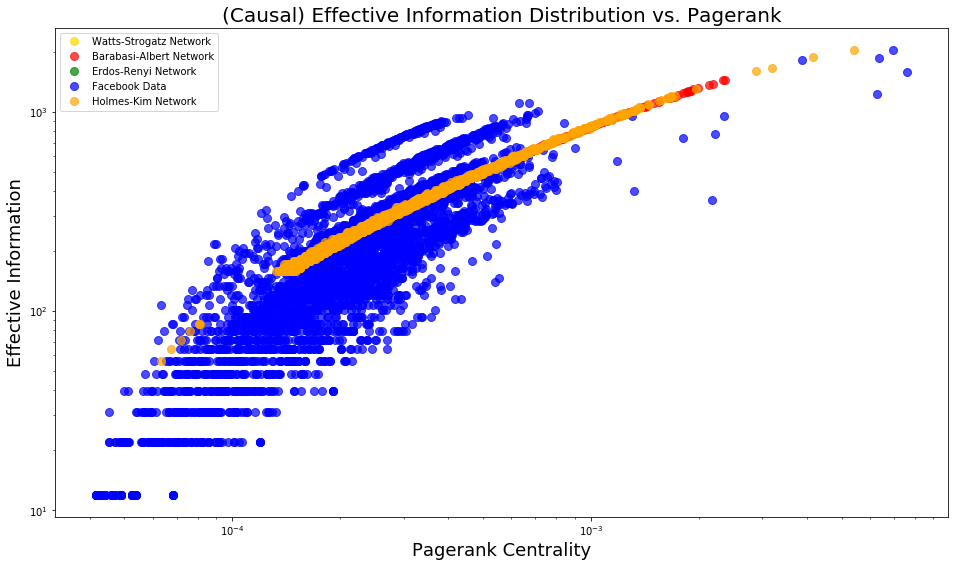

In [14]:
plt.figure(figsize=(16,9))
plt.loglog(nx.pagerank(ws).values(), ws_eff.values(), 
           'o', markersize = 8, alpha = 0.7, color = "gold", label = "Watts-Strogatz Network")
plt.loglog(nx.pagerank(ba).values(), ba_eff.values(), 
           'o', markersize = 8, alpha = 0.7, color = "red", label = "Barabasi-Albert Network")
plt.loglog(nx.pagerank(er).values(), er_eff.values(), 
           'o', markersize = 8, alpha = 0.7, color = "green", label = "Erdos-Renyi Network")
plt.loglog(nx.pagerank(fb).values(), fb_eff.values(), 
           'o', markersize = 8, alpha = 0.7, color = "blue", label = "Facebook Data")
plt.loglog(nx.pagerank(hk).values(), hk_eff.values(), 
           'o', markersize = 8, alpha = 0.7, color = "orange", label = "Holmes-Kim Network")

plt.xlabel("Pagerank Centrality", size = 18)
plt.ylabel("Effective Information", size = 18)
plt.legend()
plt.title("(Causal) Effective Information Distribution vs. Pagerank", size = 20)
plt.show()

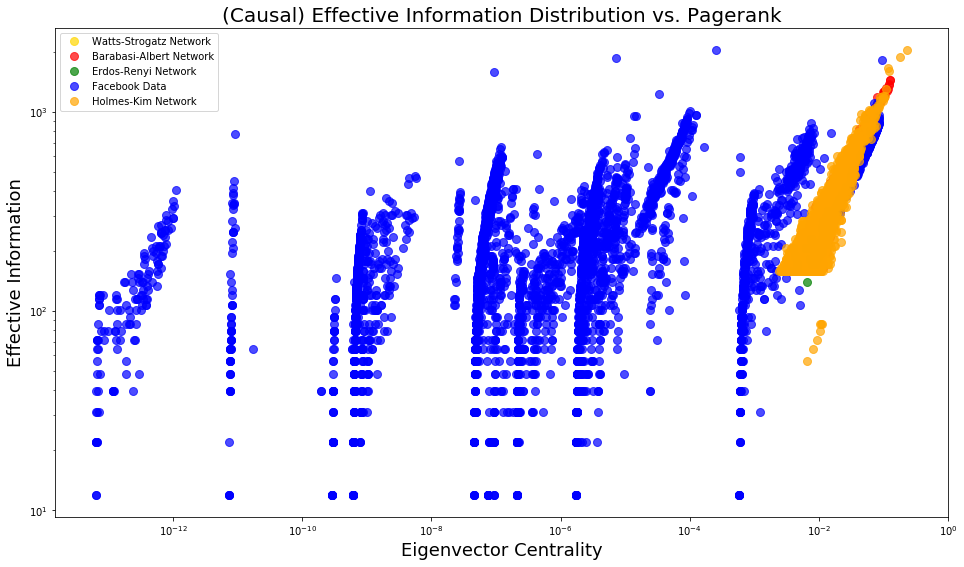

In [15]:
plt.figure(figsize=(16,9))
plt.loglog(nx.eigenvector_centrality(ws).values(), ws_eff.values(), 
           'o', markersize = 8, alpha = 0.7, color = "gold", label = "Watts-Strogatz Network")
plt.loglog(nx.eigenvector_centrality(ba).values(), ba_eff.values(), 
           'o', markersize = 8, alpha = 0.7, color = "red", label = "Barabasi-Albert Network")
plt.loglog(nx.eigenvector_centrality(er).values(), er_eff.values(), 
           'o', markersize = 8, alpha = 0.7, color = "green", label = "Erdos-Renyi Network")
plt.loglog(nx.eigenvector_centrality(fb).values(), fb_eff.values(), 
           'o', markersize = 8, alpha = 0.7, color = "blue", label = "Facebook Data")
plt.loglog(nx.eigenvector_centrality(hk).values(), hk_eff.values(), 
           'o', markersize = 8, alpha = 0.7, color = "orange", label = "Holmes-Kim Network")

plt.xlabel("Eigenvector Centrality", size = 18)
plt.ylabel("Effective Information", size = 18)
plt.legend()
plt.title("(Causal) Effective Information Distribution vs. Pagerank", size = 20)
plt.show()

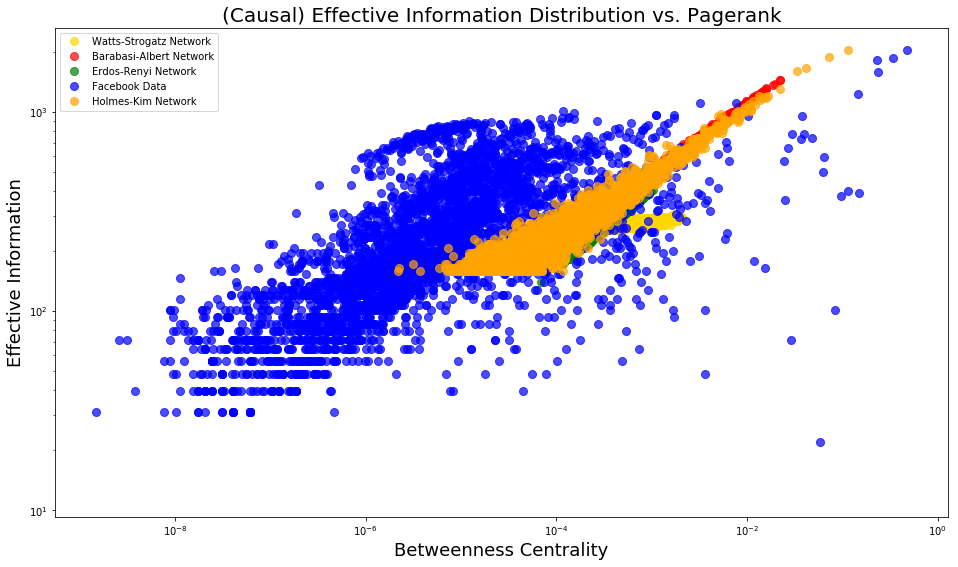

In [16]:
plt.figure(figsize=(16,9))
plt.loglog(nx.betweenness_centrality(ws).values(), ws_eff.values(), 
           'o', markersize = 8, alpha = 0.7, color = "gold", label = "Watts-Strogatz Network")
plt.loglog(nx.betweenness_centrality(ba).values(), ba_eff.values(), 
           'o', markersize = 8, alpha = 0.7, color = "red", label = "Barabasi-Albert Network")
plt.loglog(nx.betweenness_centrality(er).values(), er_eff.values(), 
           'o', markersize = 8, alpha = 0.7, color = "green", label = "Erdos-Renyi Network")
plt.loglog(nx.betweenness_centrality(fb).values(), fb_eff.values(), 
           'o', markersize = 8, alpha = 0.7, color = "blue", label = "Facebook Data")
plt.loglog(nx.betweenness_centrality(hk).values(), hk_eff.values(), 
           'o', markersize = 8, alpha = 0.7, color = "orange", label = "Holmes-Kim Network")

plt.xlabel("Betweenness Centrality", size = 18)
plt.ylabel("Effective Information", size = 18)
plt.legend()
plt.title("(Causal) Effective Information Distribution vs. Pagerank", size = 20)
plt.show()

In [10]:
TAU = 0.15
PAGE_RANK = 'page_rank'
MODULE_ID = 'module_id'

In [11]:
def entropy1(prob):
    """Half of the entropy function, as used in the InfoMap paper. entropy1(p) = p * log2(p)"""
    if prob == 0:
        return 0
    return prob * np.log2(prob)

In [12]:
class Module:
    """Stores the information about a single module"""
    def __init__(self, module_id, nodes, graph):

        self.module_id = module_id
        self.nodes = frozenset(nodes)
        self.graph = graph
        self.prop_nodes = 1 - float(len(self.nodes)) / len(graph)
        
        # Set the module_id for every node
        for node in nodes:
            graph.node[node][MODULE_ID] = module_id
        
        # Compute the total PageRank
        self.total_pr = sum([graph.node[node][PAGE_RANK] for node in nodes])
        
        # Compute q_out, the exit probability of this module
        # .. Left half: tau * (n - n_i) / n * sum{alpha in i}(p_alpha)
        self.q_out = self.total_pr * TAU * self.prop_nodes
        
        # .. Right half: (1-tau) * sum{alpha in i}(sum{beta not in i} p_alpha weight_alpha, beta)
        # This is what's in [RAB2009 eq. 6]. But it's apparently wrong if node alpha has no out-edges
        
        for node in self.nodes:
            edges = graph.edges(node, data=True)
            page_rank = graph.node[node][PAGE_RANK]

            if len(edges) == 0:
                self.q_out += page_rank * self.prop_nodes * (1 - TAU)
                continue
            
            for (_, dest, data) in edges:
                if dest not in self.nodes:
                    self.q_out += page_rank * data['weight'] * (1 - TAU)
        
        self.q_plus_p = self.q_out + self.total_pr

    def get_codebook_length(self):
        "Computes module codebook length according to [RAB2009, eq. 3]"
        first = -entropy1(self.q_out / self.q_plus_p)
        second = -sum([entropy1(self.graph.node[node][PAGE_RANK]/self.q_plus_p) for node in self.nodes])

        return (self.q_plus_p) * (first + second)

In [13]:
class Clustering:
    "Stores a clustering of the graph into modules"
    def __init__(self, graph, modules):
        self.graph = graph
        self.total_pr_entropy = sum([entropy1(graph.node[node][PAGE_RANK]) for node in graph])
        self.modules = [Module(module_id, module, graph) for (module_id, module) in enumerate(modules)]

    def get_mdl(self):
        "Compute the MDL of this clustering according to [RAB2009, eq. 4]"
        total_qout = 0
        total_qout_entropy = 0
        total_both_entropy = 0

        for mod in self.modules:
            q_out = mod.q_out
            total_qout += q_out
            total_qout_entropy += entropy1(q_out)
            total_both_entropy += entropy1(mod.q_plus_p)
        
        term1 = entropy1(total_qout)
        term2 = -2 * total_qout_entropy
        term3 = -self.total_pr_entropy
        term4 = total_both_entropy
        
        return term1 + term2 + term3 + term4

    def get_index_codelength(self):
        "Compute the index codebook length according to [RAB2009, eq. 2]"
        if len(self.modules) == 1:
            return 0

        total_q = sum([mod.q_out for mod in self.modules])
        entropy = -sum([entropy1(mod.q_out / total_q) for mod in self.modules])
        
        return total_q * entropy

    def get_module_codelength(self):
        "Compute the module codebook length according to [RAB2009, eq. 3]"

        return sum([mod.get_codebook_length() for mod in self.modules])

In [14]:
def print_tree_file(graph, modules):
    """Produces a .tree file from the given clustering that is compatible with the InfoMapCheck utility."""
    for (mod_id, mod) in enumerate(modules):
        for (node_id, node) in enumerate(mod):
            print "%d:%d %f \"%s\"" % (mod_id+1, node_id+1,graph.node[node][PAGE_RANK], node)

def load_and_process_graph(filename):
    """Load the graph, normalize edge weights, compute pagerank, and store all this back in node data."""
    # Load the graph
    graph = nx.DiGraph(nx.read_pajek(filename))
    print "Loaded a graph (%d nodes, %d edges)" % (len(graph), len(graph.edges()))

    # Compute the normalized edge weights
    for node in graph:
        edges = graph.edges(node, data=True)
        total_weight = sum([data['weight'] for (_, _, data) in edges])
        for (_, _, data) in edges:
            data['weight'] = data['weight'] / total_weight
    
    # Get its PageRank, alpha is 1-tau where [RAB2009 says \tau=0.15]
    page_ranks = nx.pagerank(graph, alpha=1-TAU)
    
    for (node, page_rank) in page_ranks.items():
        graph.node[node][PAGE_RANK] = page_rank
    
    return graph



In [15]:
def main(argv):
    "Read the supplied graph and modules and output MDL"
    # Read the arguments
    parser = argparse.ArgumentParser(description="Calculate the infomap")
    parser.add_argument('-g', '--graph-filename', type=argparse.FileType('r'), help="the .net file to use as the graph", required=True)
    parser.add_argument('-m', '--module-filename', default="2009_figure3a.mod", help="the .mod file to use as the clustering")
    options = parser.parse_args(argv[1:])

    graph = load_and_process_graph(options.graph_filename)

    # single_nodes is the "trivial" module mapping
    single_nodes = [[nodes] for nodes in graph]

    # If clustering provided, use it.
    try:
        modules = [line.strip().split() for line in options.graph_filename]
    except IOError:
        print ">>", sys.exc_info()[0]
        print ">> No .mod file provided, or error reading it"
        print ">> Using default clustering of every node in its own module"
        modules = single_nodes

    clustering = Clustering(graph, modules)
    print "This clustering has MDL %.2f (Index %.2f, Module %.2f)" % \
        (clustering.get_mdl(), clustering.get_index_codelength(), clustering.get_module_codelength())

In [ ]:
"Read the supplied graph and modules and output MDL"
# Read the arguments
parser = argparse.ArgumentParser(description="Calculate the infomap")
parser.add_argument('-g', '--graph-filename', type=argparse.FileType('r'),
                    help="the .net file to use as the graph", required=True)
parser.add_argument('-m', '--module-filename', default="2009_figure3a.mod",
                    help="the .mod file to use as the clustering")
options = parser.parse_args(argv[1:])

graph = load_and_process_graph(options.graph_filename)

# single_nodes is the "trivial" module mapping
single_nodes = [[nodes] for nodes in graph]

# If clustering provided, use it.
try:
    modules = [line.strip().split() for line in options.graph_filename]
except IOError:
    print ">>", sys.exc_info()[0]
    print ">> No .mod file provided, or error reading it"
    print ">> Using default clustering of every node in its own module"
    modules = single_nodes

clustering = Clustering(graph, modules)
print "This clustering has MDL %.2f (Index %.2f, Module %.2f)" % \ 
    (clustering.get_mdl(), clustering.get_index_codelength(), clustering.get_module_codelength())

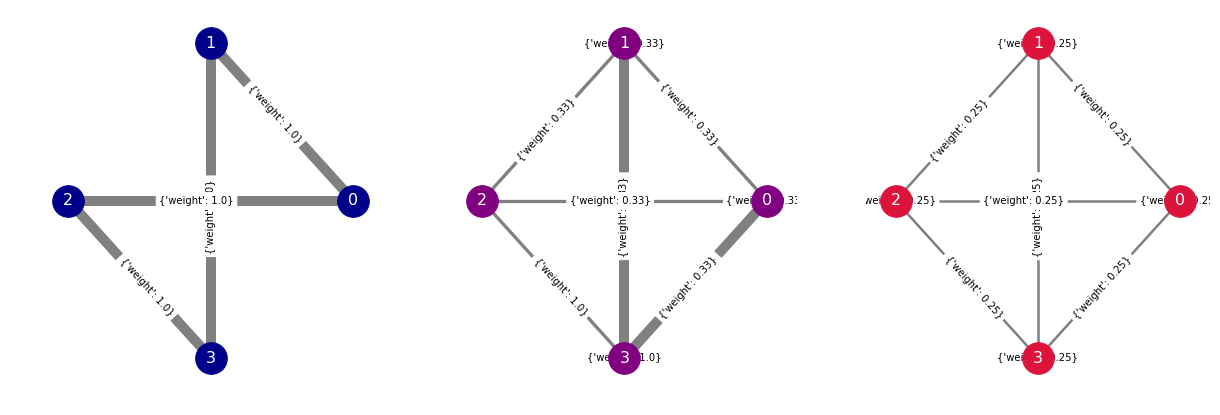

In [80]:
M1 = np.array([[0,0,1.0,0], 
               [1.0,0,0,0], 
               [0,0,0,1.0], 
               [0,1.0,0,0]])
g1 = nx.from_numpy_matrix(M1)
M2 = np.array([[0.33,0.33,0.33,0.33], 
               [0.33,0.33,0.33,0.33], 
               [0,0,0,1], 
               [0,0,0,1]])
g2 = nx.from_numpy_matrix(M2)
M3 = np.array([[1./4,1./4,1./4,1./4], 
               [1./4,1./4,1./4,1./4], 
               [1./4,1./4,1./4,1./4], 
               [1./4,1./4,1./4,1./4]])
g3 = nx.from_numpy_matrix(M3)
pos1 = nx.circular_layout(g1)
pos2 = nx.circular_layout(g2)
pos3 = nx.circular_layout(g3)

fig, ax = plt.subplots(1, 3, figsize=(21, 7))

nx.draw_networkx_nodes(g1, pos1, node_size=1000, ax=ax[0], node_color='darkblue')
nx.draw_networkx_edges(g1, pos1, ax=ax[0], edge_color= "grey",
                       width=10*np.array(nx.get_edge_attributes(g1, "weight").values()))

nx.draw_networkx_nodes(g2, pos2, node_size=1000, ax=ax[1], node_color='purple')
nx.draw_networkx_edges(g2, pos2, ax=ax[1], edge_color= "grey",
                       width=10*np.array(nx.get_edge_attributes(g2, "weight").values()))

nx.draw_networkx_nodes(g3, pos3, node_size=1000, ax=ax[2], node_color='crimson')
nx.draw_networkx_edges(g3, pos3, ax=ax[2], edge_color= "grey",
                       width=10*np.array(nx.get_edge_attributes(g3, "weight").values()))
nx.draw_networkx_labels(g1,pos1,font_size=16,ax=ax[0],font_color="white")
nx.draw_networkx_labels(g2,pos2,font_size=16,ax=ax[1],font_color="white")
nx.draw_networkx_labels(g3,pos3,font_size=16,ax=ax[2],font_color="white")

el1 = nx.get_edge_attributes(g1, "weight").values()
el2 = nx.get_edge_attributes(g2, "weight").values()
el3 = nx.get_edge_attributes(g3, "weight").values()
nx.draw_networkx_edge_labels(g1, pos1, labels=el1, ax=ax[0], label_pos=0.45)
nx.draw_networkx_edge_labels(g2, pos2, labels=el2, ax=ax[1], label_pos=0.45)
nx.draw_networkx_edge_labels(g3, pos3, labels=el3, ax=ax[2], label_pos=0.45)

ax[0].set_axis_off()
ax[1].set_axis_off()
ax[2].set_axis_off()

plt.show()

In [ ]:
import networkx as nx
def markov_blanket(G, n):
    """
    Returns the Markov blanket of `n`.
    The Markov blanket consists of the parents of `n`, the children of `n`, and
    any other parents of the children of `n`.
    Parameters
    ----------
    G : DiGraph
        A direct acyclic graph.
    n : node
        A node in `G`.
    Returns
    -------
    blanket : set
        The Markov blanket of `n`.
    Notes
    -----
    The procedure works for any directed graph, but the interpretation of the
    result is valid only when `G` is a DAG.
    """
    blanket = set(G.pred[n])
    children = list(G.succ[n].keys())
    blanket.update(children)
    for child in children:
        blanket.update(G.pred[child])
    return blanket

def moralize(G):
    """
    Returns the moral graph of `G`.
    The moral graph is an undirected graph where every node in `G` is connected
    to its Markov blanket.
    Parameters
    ----------
    G : DiGraph
        A direct acyclic graph.
    Returns
    -------
    MG : Graph
        The moral graph of `G`.
    """
    MG = nx.Graph()
    for u in G:
        blanket = markov_blanket(G, u)
        MG.add_edges_from([(u, v) for v in blanket if v != u])
    return MG